In [94]:
# 🚀 Comenzar de nuevo con la metodología correcta

import pandas as pd
import numpy as np
import re

# Cargar los datasets
df_combined_responses = pd.read_csv("Data_def.csv")
df_surtiapp = pd.read_csv("surtiapp_dataset.csv")

# Paso 1: Unir ambos datasets manteniendo solo las columnas presentes en df_combined_responses
common_columns = list(df_combined_responses.columns)
df_final_merged = pd.concat([df_combined_responses[common_columns], df_surtiapp[common_columns]], ignore_index=True)

# Paso 2: Extraer la ID del producto desde la URL (última parte de la URL)
def extract_product_id(url):
    match = re.search(r"ProductDetail/([a-z0-9-]+)$", str(url))
    return match.group(1) if match else None

df_final_merged["product_id"] = df_final_merged["product_URL"].apply(extract_product_id)

# Paso 3: Crear una columna con el precio real, usando discount_price si es diferente de 0
df_final_merged["real_price"] = df_final_merged.apply(
    lambda row: row["discount_price"] if row["discount_price"] > 0 else row["price"], axis=1
)

# Paso 4: Filtrar solo datos del último mes
# Convertir fechas a formato datetime asegurando compatibilidad con ISO 8601
df_final_merged["date_scrape"] = pd.to_datetime(df_final_merged["date_scrape"], format="ISO8601", errors="coerce")

# Filtrar solo datos del último mes
fecha_limite = df_final_merged["date_scrape"].max() - pd.DateOffset(days=30)
df_last_month = df_final_merged[df_final_merged["date_scrape"] >= fecha_limite]


# Paso 5: Calcular la desviación estándar del precio por producto usando su ID
price_variability_by_product = df_last_month.groupby("product_id")["real_price"].std().reset_index()

# Renombrar la columna correctamente
price_variability_by_product = price_variability_by_product.rename(columns={
    "real_price": "Desviación Estándar del Precio"
})

# Agregar la categoría correspondiente a cada producto
price_variability_by_product = price_variability_by_product.merge(df_last_month[["product_id", "subcategory"]].drop_duplicates(),
                                                                 on="product_id", how="left")

# Paso 6: Calcular la desviación estándar promedio por subcategoría
price_variability_by_category = price_variability_by_product.groupby("subcategory")["Desviación Estándar del Precio"].mean().reset_index()

# Renombrar columnas para mayor claridad
price_variability_by_category = price_variability_by_category.rename(columns={
    "subcategory": "Subcategoría",
    "Desviación Estándar del Precio": "Variabilidad Promedio del Precio"
})

# Ordenar de mayor a menor variabilidad
price_variability_by_category_sorted = price_variability_by_category.sort_values("Variabilidad Promedio del Precio", ascending=False)



C:\Users\USER\AppData\Local\Temp\ipykernel_15324\1232596288.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Subcategoría", y="Variabilidad Promedio del Precio",


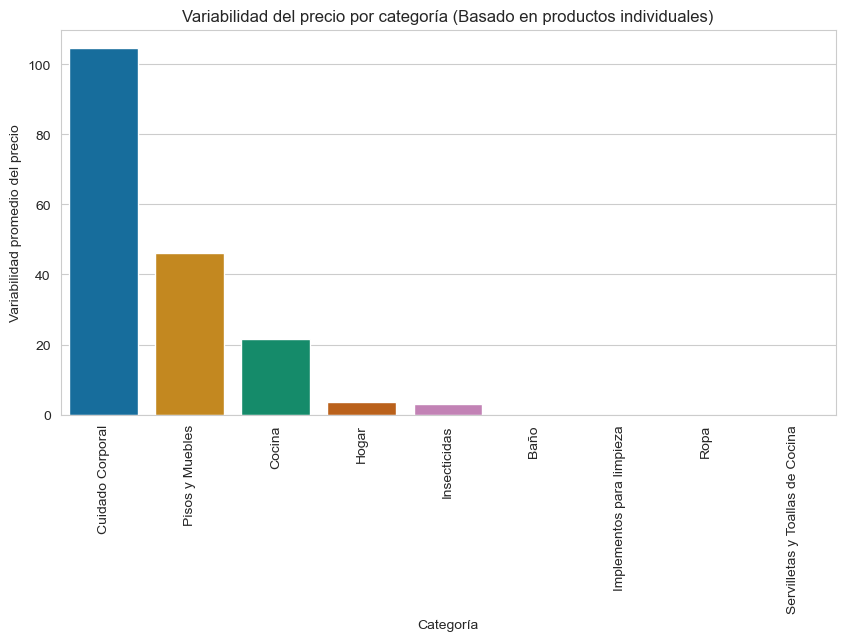

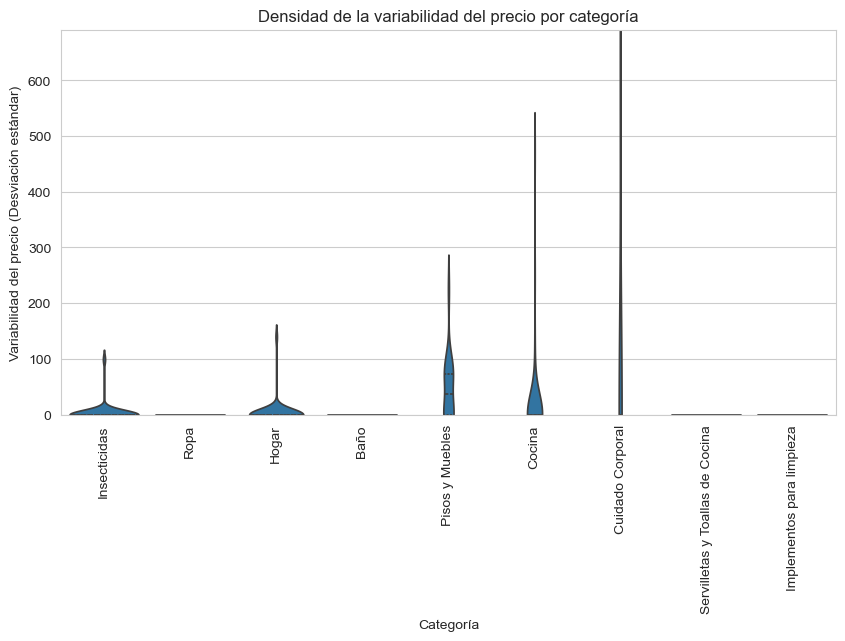

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de Seaborn
sns.set_style("whitegrid")

# 📊 Gráfico de barras: Variabilidad promedio de precios por categoría (Ordenado)
plt.figure(figsize=(10, 5))
sns.barplot(x="Subcategoría", y="Variabilidad Promedio del Precio", 
            data=price_variability_by_category_sorted, 
            palette="colorblind")  # Usa la paleta de colores 'viridis'
plt.xticks(rotation=90)  # Categorías en vertical
plt.xlabel("Categoría")
plt.ylabel("Variabilidad promedio del precio")
plt.title("Variabilidad del precio por categoría (Basado en productos individuales)")
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Filtrar solo productos con datos válidos (sin desviaciones estándar negativas)
price_variability_by_product_filtered = price_variability_by_product[price_variability_by_product["Desviación Estándar del Precio"] >= 0].copy()

# 📈 Verificar si aún hay valores negativos en la desviación estándar
negative_std_values = price_variability_by_product_filtered[price_variability_by_product_filtered["Desviación Estándar del Precio"] < 0]



# 📊 Violin Plot: Densidad de la variabilidad del precio por categoría
plt.figure(figsize=(10, 5))
sns.violinplot(x="subcategory", 
               y="Desviación Estándar del Precio", 
               data=price_variability_by_product_filtered, 
               inner="quartile", 
               )  # Usamos la paleta 'muted' para colores más suaves y diferenciables

# ✅ Ajustes para mejorar la visualización
plt.xticks(rotation=90)  # Categorías en vertical para mejor legibilidad
plt.xlabel("Categoría")
plt.ylabel("Variabilidad del precio (Desviación estándar)")
plt.title("Densidad de la variabilidad del precio por categoría")

# ✅ Limitar el eje Y para evitar valores negativos y mejorar la escala
plt.ylim(0, price_variability_by_product_filtered["Desviación Estándar del Precio"].max() * 1.1)

# 📌 Mostrar gráfico corregido
plt.show()




In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Cargar los archivos
file_combined_responses = "/mnt/data/Data_def.csv"
file_surtiapp = "/mnt/data/surtiapp_dataset.csv"

df_combined_responses = pd.read_csv(file_combined_responses)
df_surtiapp = pd.read_csv(file_surtiapp)

# Paso 1: Unir ambos datasets manteniendo solo las columnas presentes en df_combined_responses
common_columns = list(df_combined_responses.columns)
df_final_merged = pd.concat([df_combined_responses[common_columns], df_surtiapp[common_columns]], ignore_index=True)

# Paso 2: Extraer la ID del producto desde la URL (última parte de la URL)
def extract_product_id(url):
    match = re.search(r"ProductDetail/([a-z0-9-]+)$", str(url))
    return match.group(1) if match else None

df_final_merged["product_id"] = df_final_merged["product_URL"].apply(extract_product_id)

# Paso 3: Crear una columna con el precio real, usando discount_price si es diferente de 0
df_final_merged["real_price"] = df_final_merged.apply(
    lambda row: row["discount_price"] if row["discount_price"] > 0 else row["price"], axis=1
)

# Paso 4: Convertir fechas a formato datetime asegurando compatibilidad con ISO 8601
df_final_merged["date_scrape"] = pd.to_datetime(df_final_merged["date_scrape"], errors="coerce")

# Filtrar productos con más de una fecha de registro
df_filtered_trend = df_final_merged.groupby("product_id").filter(lambda x: x["date_scrape"].nunique() > 1)

# Lista para almacenar resultados
trend_slopes_fixed = []

# Iterar por cada producto con múltiples fechas registradas
for product_id, group in df_filtered_trend.groupby("product_id"):
    group = group.sort_values("date_scrape")  # Asegurar orden temporal
    days = (group["date_scrape"] - group["date_scrape"].min()).dt.days
    
    # Asegurar que hay más de un valor único en days
    if len(np.unique(days)) > 1:
        slope_price, _, _, _, _ = linregress(days, group["real_price"])
        slope_stock, _, _, _, _ = linregress(days, group["available_quantity"])
        trend_slopes_fixed.append({"product_id": product_id, "Trend Slope Precio": slope_price, "Trend Slope Stock": slope_stock})

# Convertir los resultados a DataFrame
trend_slopes_df_fixed = pd.DataFrame(trend_slopes_fixed)

# 📈 Gráfico de dispersión: Relación entre Trend Slope del stock y del precio
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Trend Slope Stock", y="Trend Slope Precio", data=trend_slopes_df_fixed)
plt.axhline(0, color="red", linestyle="--")  # Línea horizontal en y=0 para aumentos/disminuciones de precio
plt.axvline(0, color="blue", linestyle="--")  # Línea vertical en x=0 para aumentos/disminuciones de stock
plt.xlabel("Trend Slope del Stock")
plt.ylabel("Trend Slope del Precio")
plt.title("Relación entre la Tendencia del Stock y la Tendencia del Precio")
plt.grid(True)

# Mostrar gráfico
plt.show()

# Mostrar resumen de los resultados para verificar datos calculados correctamente
trend_slopes_df_fixed.describe()


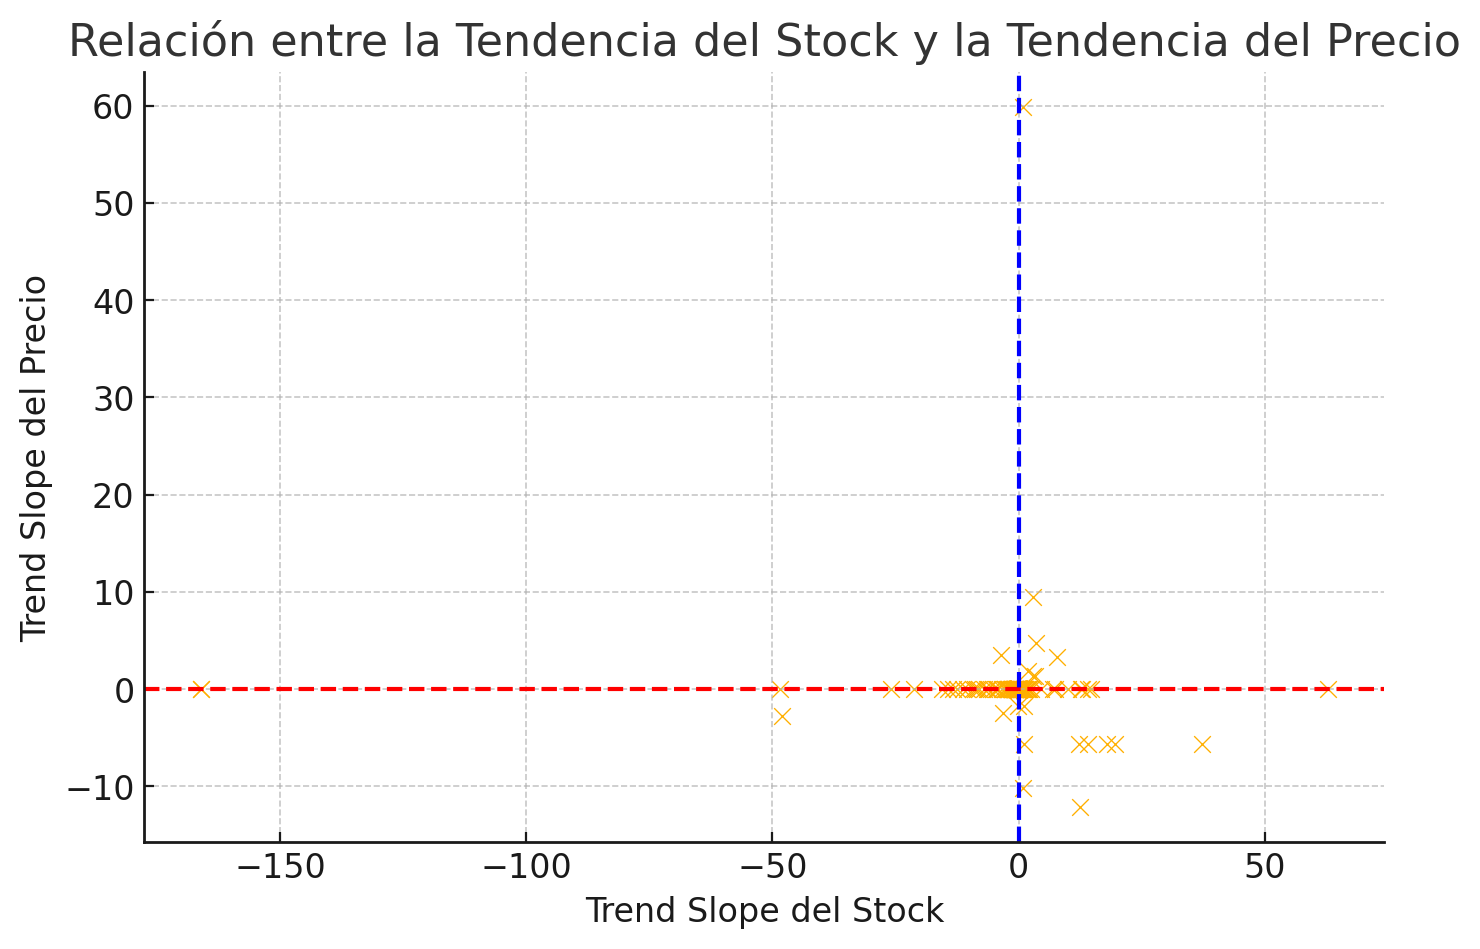

🔍 Cantidad de productos nuevos identificados: 81


C:\Users\USER\AppData\Local\Temp\ipykernel_15324\2225032733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Categoría", y="Cantidad de nuevos productos", data=new_products_by_category, palette="muted")


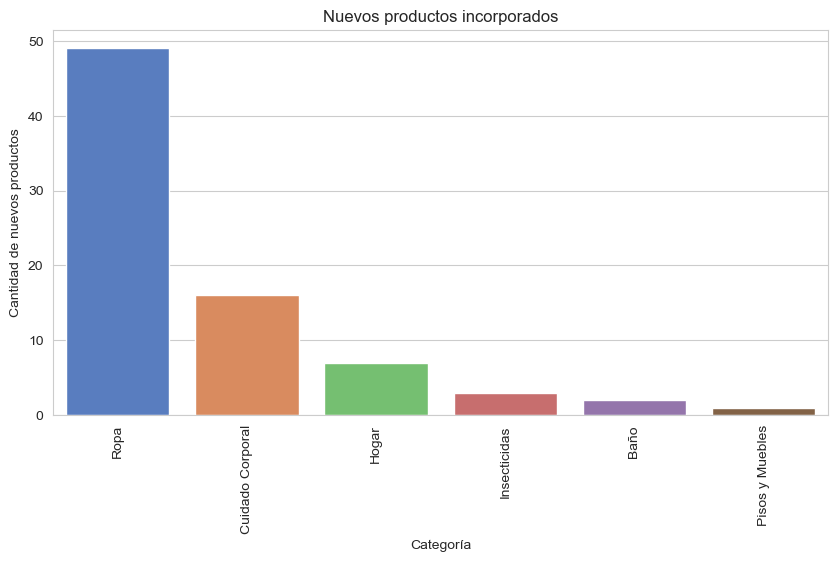

Cantidad total de productos nuevos: 82
          Categoría  Cantidad de nuevos productos
0              Ropa                            49
1  Cuidado Corporal                            16
2             Hogar                             7
3      Insecticidas                             3
4              Baño                             2
5   Pisos y Muebles                             1


In [176]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos de datos
file_combined_responses = "Data_def.csv"  # Datos nuevos (13 de marzo)
file_surtiapp = "surtiapp_dataset.csv"  # Datos antiguos (6 de marzo)

df_new = pd.read_csv(file_combined_responses)  # Datos nuevos
df_old = pd.read_csv(file_surtiapp)  # Datos antiguos

# Función para extraer ID del producto desde la URL
def extract_product_id(url):
    match = re.search(r"ProductDetail/([a-z0-9-]+)$", str(url))
    return match.group(1) if match else None

# Extraer product_id en ambos datasets
df_new["product_id"] = df_new["product_URL"].apply(extract_product_id)
df_old["product_id"] = df_old["product_URL"].apply(extract_product_id)

# Eliminar valores nulos de product_id
df_new = df_new.dropna(subset=["product_id"])
df_old = df_old.dropna(subset=["product_id"])

# Identificar productos que están en df_new pero no en df_old
productos_antes = set(df_old["product_id"])
productos_despues = set(df_new["product_id"])

productos_nuevos = productos_despues - productos_antes
print(f"🔍 Cantidad de productos nuevos identificados: {len(productos_nuevos)}")

# Filtrar solo los productos nuevos
new_products = df_new[df_new["product_id"].isin(productos_nuevos)]

# Verificar si hay productos nuevos antes de continuar
if new_products.empty:
    print("⚠️ No se encontraron productos nuevos. Revisa la extracción de IDs.")
else:
    # Contar nuevos productos por categoría
    new_products_by_category = new_products["subcategory"].value_counts().reset_index()
    new_products_by_category.columns = ["Categoría", "Cantidad de nuevos productos"]

    # 📊 Graficar nuevos productos por categoría
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Categoría", y="Cantidad de nuevos productos", data=new_products_by_category, palette="muted")
    plt.xticks(rotation=90)
    plt.xlabel("Categoría")
    plt.ylabel("Cantidad de nuevos productos")
    plt.title("Nuevos productos incorporados")
    plt.show()

    # Mostrar resultados en la consola
    print("Cantidad total de productos nuevos:", new_products.shape[0])
    print(new_products_by_category)


C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


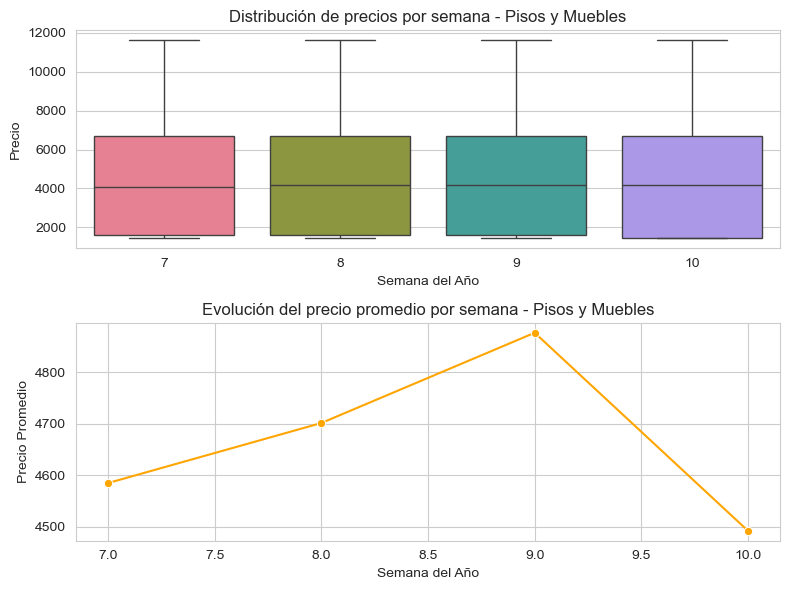

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


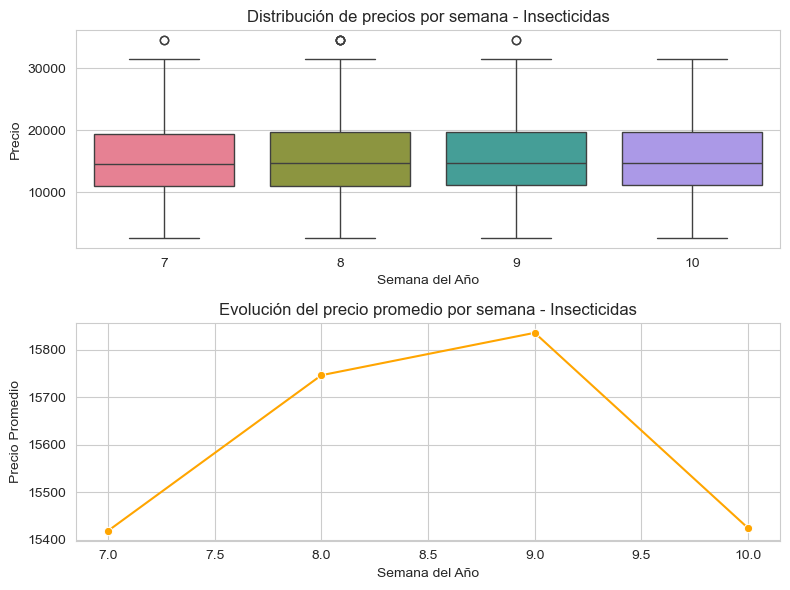

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


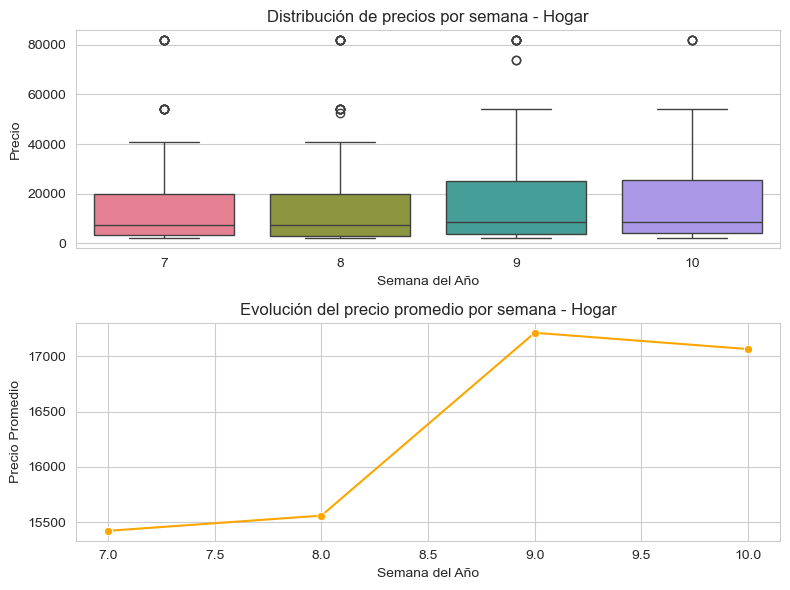

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


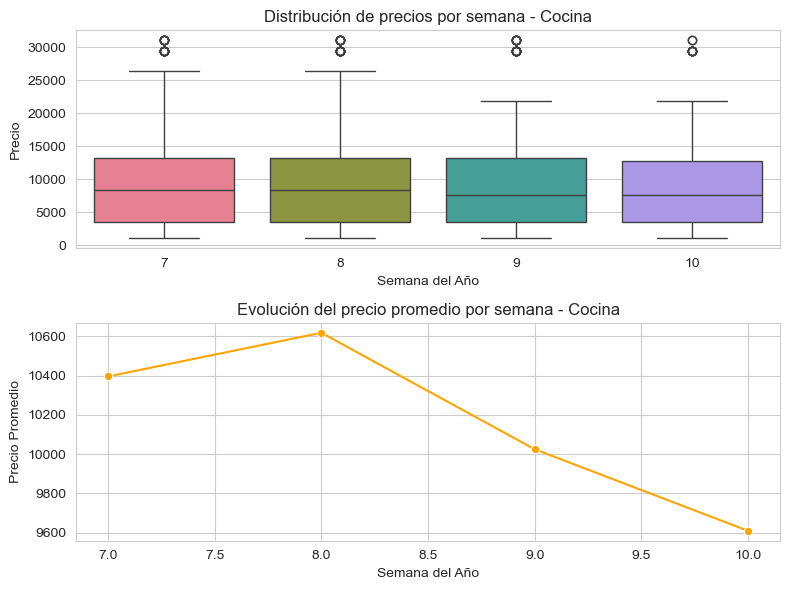

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


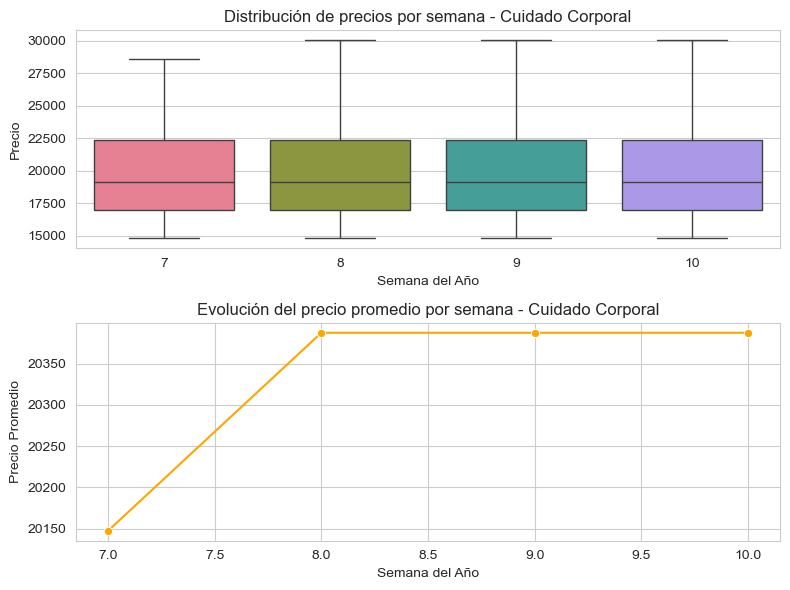

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


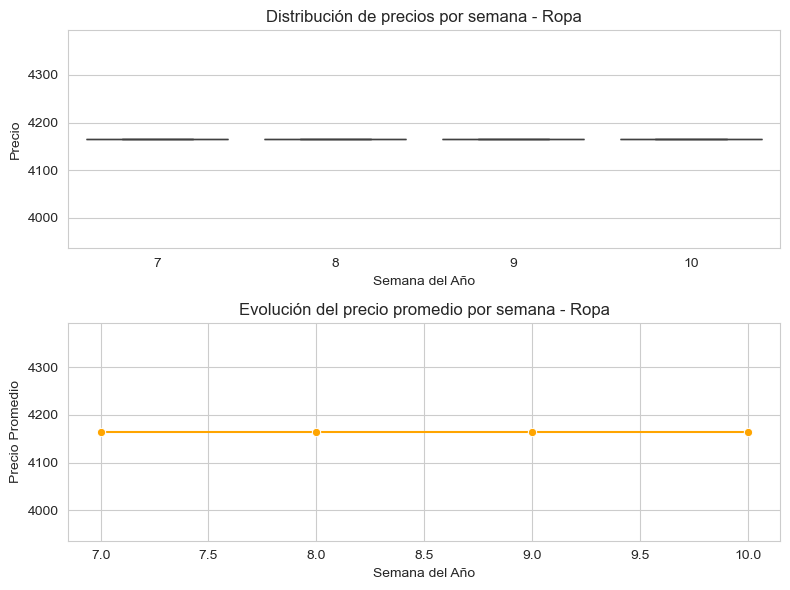

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


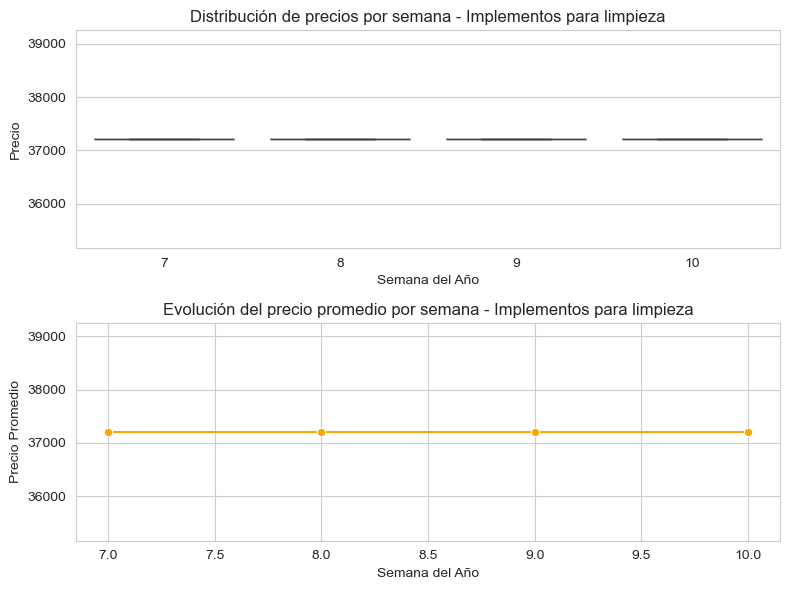

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


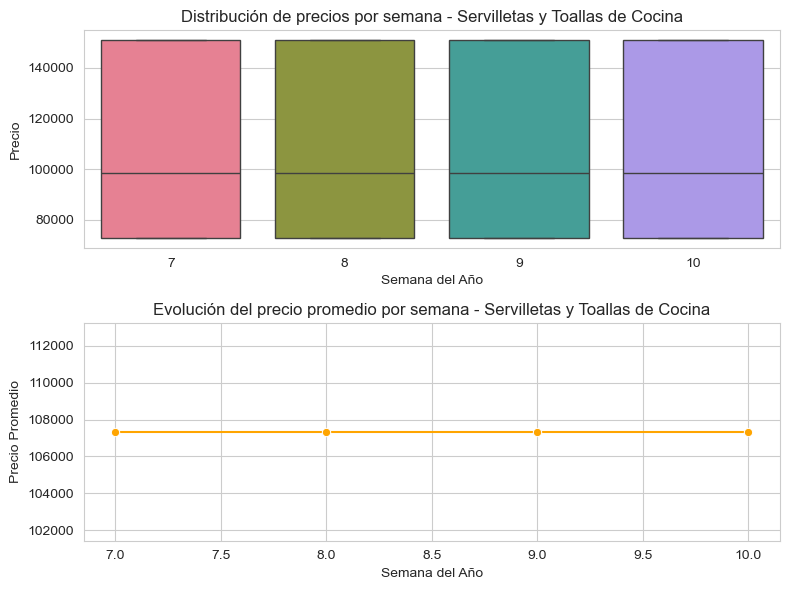

C:\Users\USER\AppData\Local\Temp\ipykernel_15324\526846737.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")


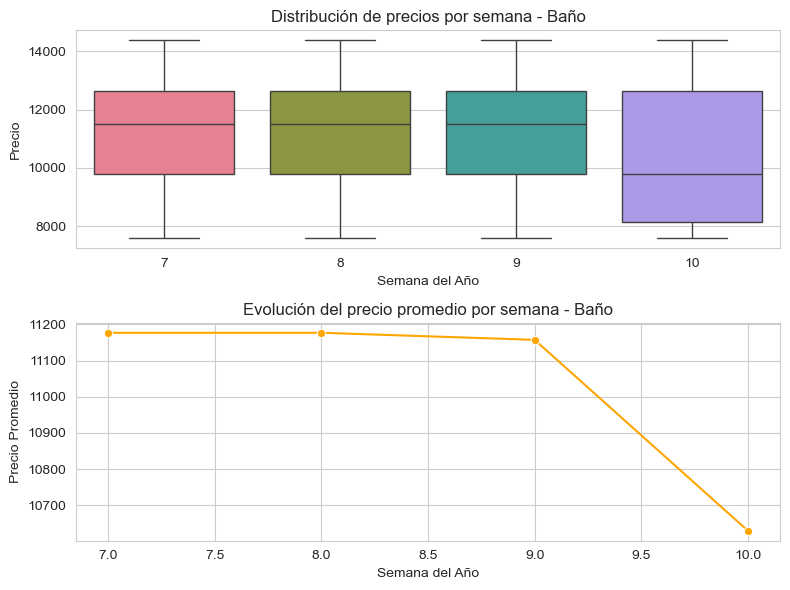

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Cargar los archivos de datos
file_combined_responses = "Data_def.csv"  # Datos nuevos (13 de marzo)
file_surtiapp = "surtiapp_dataset.csv"  # Datos antiguos (6 de marzo)

df_new = pd.read_csv(file_combined_responses)
df_old = pd.read_csv(file_surtiapp)

# Extraer ID del producto desde la URL para ambos datasets
def extract_product_id(url):
    match = re.search(r"ProductDetail/([a-z0-9-]+)$", str(url))
    return match.group(1) if match else None

df_new["product_id"] = df_new["product_URL"].apply(extract_product_id)
df_old["product_id"] = df_old["product_URL"].apply(extract_product_id)

# Unir ambos datasets
df_combined = pd.concat([df_old, df_new], ignore_index=True)

# Convertir la fecha a formato datetime
df_combined["date_scrape"] = pd.to_datetime(df_combined["date_scrape"], errors="coerce")

# Crear columna de semana del año
df_combined["week"] = df_combined["date_scrape"].dt.isocalendar().week

# Crear columna de precio real (usando discount_price si está disponible)
df_combined["real_price"] = df_combined.apply(
    lambda row: row["discount_price"] if row["discount_price"] > 0 else row["price"], axis=1
)

# Filtrar las semanas relevantes
df_combined = df_combined[df_combined["week"].between(7, 11)]

# Lista de categorías únicas
categories = df_combined["subcategory"].unique()

# Generar gráficos por categoría
for category in categories:
    df_category = df_combined[df_combined["subcategory"] == category]

    fig, axes = plt.subplots(2, 1, figsize=(8, 6))

    # 📊 Boxplot: Distribución de precios por semana
    sns.boxplot(x="week", y="real_price", data=df_category, ax=axes[0], palette="husl")
    axes[0].set_title(f"Distribución de precios por semana - {category}")
    axes[0].set_xlabel("Semana del Año")
    axes[0].set_ylabel("Precio")

    # 📈 Línea de evolución del precio promedio
    avg_price_per_week = df_category.groupby("week")["real_price"].mean().reset_index()
    sns.lineplot(x="week", y="real_price", data=avg_price_per_week, ax=axes[1], marker="o", color="orange")
    axes[1].set_title(f"Evolución del precio promedio por semana - {category}")
    axes[1].set_xlabel("Semana del Año")
    axes[1].set_ylabel("Precio Promedio")

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()


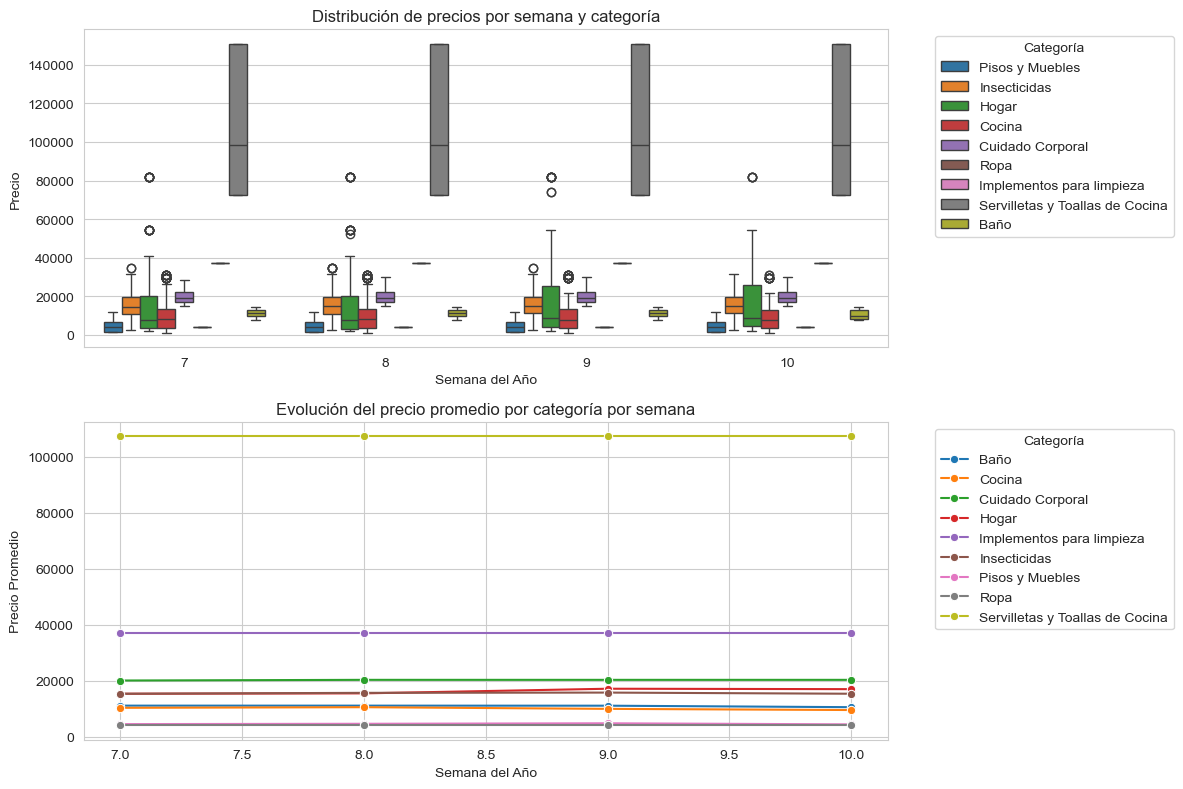

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Cargar los archivos de datos
file_combined_responses = "Data_def.csv"  # Datos nuevos (13 de marzo)
file_surtiapp = "surtiapp_dataset.csv"  # Datos antiguos (6 de marzo)

df_new = pd.read_csv(file_combined_responses)
df_old = pd.read_csv(file_surtiapp)

# Extraer ID del producto desde la URL para ambos datasets
def extract_product_id(url):
    match = re.search(r"ProductDetail/([a-z0-9-]+)$", str(url))
    return match.group(1) if match else None

df_new["product_id"] = df_new["product_URL"].apply(extract_product_id)
df_old["product_id"] = df_old["product_URL"].apply(extract_product_id)

# Unir ambos datasets
df_combined = pd.concat([df_old, df_new], ignore_index=True)

# Convertir la fecha a formato datetime
df_combined["date_scrape"] = pd.to_datetime(df_combined["date_scrape"], errors="coerce")

# Crear columna de semana del año
df_combined["week"] = df_combined["date_scrape"].dt.isocalendar().week

# Crear columna de precio real (usando discount_price si está disponible)
df_combined["real_price"] = df_combined.apply(
    lambda row: row["discount_price"] if row["discount_price"] > 0 else row["price"], axis=1
)

# Filtrar las semanas relevantes
df_combined = df_combined[df_combined["week"].between(7, 11)]

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear figura para ambas gráficas
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 📊 Boxplot: Distribución de precios por semana y categoría
sns.boxplot(x="week", y="real_price", hue="subcategory", data=df_combined, ax=axes[0])
axes[0].set_title("Distribución de precios por semana y categoría")
axes[0].set_xlabel("Semana del Año")
axes[0].set_ylabel("Precio")
axes[0].legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left")

# 📈 Gráfico de líneas: Evolución del precio promedio por semana y categoría
avg_price_per_week = df_combined.groupby(["week", "subcategory"])["real_price"].mean().reset_index()
sns.lineplot(x="week", y="real_price", hue="subcategory", data=avg_price_per_week, marker="o", ax=axes[1])
axes[1].set_title("Evolución del precio promedio por categoría por semana")
axes[1].set_xlabel("Semana del Año")
axes[1].set_ylabel("Precio Promedio")
axes[1].legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar diseño
plt.tight_layout()
plt.show()


In [202]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar datasets
df1 = pd.read_csv("Data_def.csv")
df2 = pd.read_csv("surtiapp_dataset.csv")

# Convertir fechas a formato datetime
df1["date_scrape"] = pd.to_datetime(df1["date_scrape"])
df2["date_scrape"] = pd.to_datetime(df2["date_scrape"], errors="coerce")

# Extraer product_id de las URLs
df1["product_id"] = df1["product_URL"].str.extract(r"ProductDetail/([^/]+)")
df2["product_id"] = df2["product_URL"].str.extract(r"ProductDetail/([^/]+)")

# Filtrar columnas relevantes
df1_filtered = df1[["product_id", "available_quantity", "date_scrape"]]
df2_filtered = df2[["product_id", "available_quantity", "date_scrape"]]

# Unir datasets
df_combined = pd.concat([df1_filtered, df2_filtered])

# Filtrar productos con stock el 13 de marzo
fecha_filtro = pd.Timestamp("2025-03-13")
df_march_13_filtered = df_combined[df_combined["date_scrape"].dt.date == fecha_filtro.date()].copy()
products_march_13 = df_march_13_filtered["product_id"].unique()
df_filtered = df_combined[df_combined["product_id"].isin(products_march_13)].copy()

# Normalizar fechas
df_filtered["date_scrape"] = pd.to_datetime(df_filtered["date_scrape"])

# Calcular tendencias de stock
product_trends = []
for product_id, group in df_filtered.groupby("product_id"):
    group = group.sort_values(by="date_scrape", ascending=True)
    stock_current = group.iloc[-1]["available_quantity"]
    last_date = group.iloc[-1]["date_scrape"]
    relevant_stock_changes = [(last_date, stock_current)]
    previous_stock = stock_current
    
    for index, row in group[::-1].iterrows():
        if row["available_quantity"] != previous_stock:
            relevant_stock_changes.append((row["date_scrape"], row["available_quantity"]))
            previous_stock = row["available_quantity"]
    
    if len(relevant_stock_changes) >= 2:
        first_date, stock_last_change = relevant_stock_changes[-1]
        days_elapsed = (last_date - first_date).days
        trend_slope = (stock_current - stock_last_change) / days_elapsed if days_elapsed > 0 else np.nan
    else:
        trend_slope = np.nan  # Manejar casos sin datos suficientes
    
    product_trends.append({
        "product_id": product_id,
        "trend_slope_stock": trend_slope,
        "last_stock": stock_current,
        "last_date": last_date,
        "first_date": first_date if len(relevant_stock_changes) >= 2 else None
    })

# Crear DataFrame con tendencias
stock_trend_recent_fixed = pd.DataFrame(product_trends)

# Evitar división por cero o NaN
stock_trend_recent_fixed = stock_trend_recent_fixed.dropna(subset=["trend_slope_stock"])
stock_trend_recent_fixed = stock_trend_recent_fixed[stock_trend_recent_fixed["trend_slope_stock"] < 0]

# Calcular días hasta agotamiento con protección contra división por cero
stock_trend_recent_fixed["days_to_zero"] = -stock_trend_recent_fixed["last_stock"] / stock_trend_recent_fixed["trend_slope_stock"]
stock_trend_recent_fixed = stock_trend_recent_fixed[stock_trend_recent_fixed["days_to_zero"].notna() & (stock_trend_recent_fixed["days_to_zero"] > 0)]

# Calcular la fecha estimada de agotamiento
stock_trend_recent_fixed["predicted_zero_date"] = stock_trend_recent_fixed["last_date"] + pd.to_timedelta(stock_trend_recent_fixed["days_to_zero"], unit="D")

# Filtrar productos que se agotarán entre el 15 y el 21 de marzo
fecha_fin_pred = pd.Timestamp("2025-03-21")
products_out_of_stock_recent_fixed = stock_trend_recent_fixed[
    (stock_trend_recent_fixed["predicted_zero_date"] > fecha_filtro) &
    (stock_trend_recent_fixed["predicted_zero_date"] <= fecha_fin_pred)
]

# Guardar resultados
products_out_of_stock_recent_fixed

,product_id,trend_slope_stock,last_stock,last_date,first_date,days_to_zero,predicted_zero_date
15,132bae6d-ec0e-48cc-8328-5a1393beca84,-166.166667,2,2025-03-13 01:00:25,2025-03-06 14:02:06.133601,0.012036,2025-03-13 01:17:44.919759280
26,1afea3f2-3e1e-4a8c-b8aa-7da934fb2577,-166.333333,1,2025-03-13 00:52:21,2025-03-06 14:01:38.498031,0.006012,2025-03-13 01:01:00.438877755
40,27671181-c0b3-ed11-a8de-6045bd33e08b,-0.346154,2,2025-03-13 01:00:28,2025-02-14 14:01:55.451932,5.777778,2025-03-18 19:40:28.000000001
76,5b351057-caca-4e3f-920f-1849d230e01c,-166.166667,2,2025-03-13 01:00:24,2025-03-06 14:02:06.133574,0.012036,2025-03-13 01:17:43.919759280
90,6db5a0a7-140e-eb11-96f5-000d3a914519,-5.966667,38,2025-03-13 00:44:55,2025-02-10 17:49:01.196290,6.368715,2025-03-19 09:35:51.983240224
127,a23f5034-fe9a-ea11-86e9-0004ffd34492,-0.296296,2,2025-03-13 00:44:55,2025-02-13 14:02:02.017907,6.750000,2025-03-19 18:44:55.000000000
130,a6cdade4-3781-4c52-b0ce-2835506e10f0,-71.285714,1,2025-03-13 00:44:54,2025-02-26 14:01:03.838729,0.014028,2025-03-13 01:05:06.024048094
165,ca3dd537-b9d2-42ea-a5de-004865b0a1c5,-166.000000,3,2025-03-13 00:44:55,2025-03-06 14:01:49.316758,0.018072,2025-03-13 01:10:56.445783130
176,dc912dc7-e988-ec11-94f6-0004ffd347fb,-0.555556,2,2025-03-13 00:57:21,2025-02-13 14:01:54.470261,3.600000,2025-03-16 15:21:21.000000000
194,f081e65b-f66b-ea11-a94c-0004ffd34543,-1.428571,8,2025-03-13 00:52:24,2025-02-12 14:02:01.228958,5.600000,2025-03-18 15:16:24.000000000
